# ELO implementation

In [1]:
import sys
import os
import pandas as pd

project_directory = "C:\\Users\\Asus\\Desktop\\Phd\\Codigo\\dfg-rating"
sys.path.append(project_directory)

In [8]:
#from dash import dcc, html, dash_table
#from dash.dash_table.Format import Group

#from dfg_rating.model.network.multiple_network import LeagueNetwork
#from dfg_rating.model.network.simple_network import RoundRobinNetwork
from dfg_rating.model.network.base_network import BaseNetwork, WhiteNetwork

from dfg_rating.model.forecast.true_forecast import LogFunctionForecast
from dfg_rating.model.rating.controlled_trend_rating import ControlledTrendRating, ControlledRandomFunction

#import dfg_rating.viz.jupyter_widgets as DFGWidgets

In [3]:
df_train = pd.read_csv("C:/Users/Asus/Desktop/Phd/Codigo/Datos/TrainingSet-FINAL.csv")
df_prediction = pd.read_csv("C:/Users/Asus/Desktop/Phd/Codigo/Datos/PredictionSet-FINAL.csv")
df_train.head()

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L


In [4]:
#Selecting only SPA1 teams and matches:
df_train_SPAIN = df_train[df_train['Lge']=='SPA1']
df_train_SPAIN.head()

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
95342,00-01,SPA1,09/09/2000,FC Barcelona,Malaga,2,1,1,W
95343,00-01,SPA1,09/09/2000,La Coruna,Athletic Bilbao,2,0,2,W
95344,00-01,SPA1,09/09/2000,Real Madrid,Valencia,2,1,1,W
95345,00-01,SPA1,09/09/2000,Real Sociedad,Santander,2,2,0,D
95346,00-01,SPA1,09/09/2000,Zaragoza,Espanyol Barcelona,1,2,-1,L


In [5]:
networks = WhiteNetwork(
    data=df_train_SPAIN,
    mapping={
        "node1": {
            "id": "HT",
            "name": "HT",
        },
        "node2": {
            "id": "AT",
            "name": "AT",
        },
        "day": "Date",
        "dayIsTimestamp": True,
        "ts_format": "%d/%m/%Y",
        "season": "Sea",
        "winner": {
            "result": "WDL",
            "translation": {
                "W": "home",
                "D": "draw",
                "L": "away"
            }
        },
        "round": "day",
        "odds": {},
        "bets": {}
    }
)

C:\Users\Asus\Desktop\Phd\Codigo\dfg-rating\dfg_rating\model\network\base_network.py:525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.table_data[self.mapping['day']] = pd.to_datetime(
C:\Users\Asus\Desktop\Phd\Codigo\dfg-rating\dfg_rating\model\network\base_network.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.table_data['Year'] = pd.DatetimeIndex(self.table_data[self.mapping['day']]).year
C:\Users\Asus\Desktop\Phd\Codigo\dfg-rating\dfg_rating\model\network\base_network.py:530: SettingWi

Network loaded correctly


In [8]:
networks.data

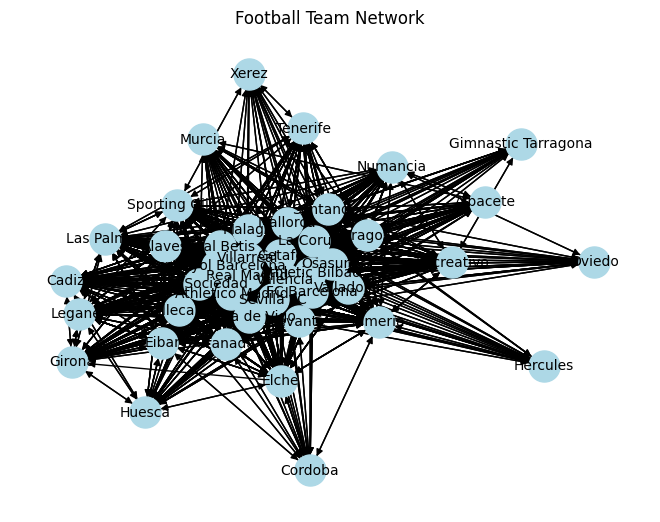

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

pos = nx.spring_layout(networks.data)  # Position nodes using a spring layout
nx.draw(networks.data, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title("Football Team Network")
plt.show()

In [19]:
print(f"Number of teams: {networks.data.number_of_nodes()} ")
print(f"Number of matches: {networks.data.number_of_edges()} ")
print(f"Number of matches per team: {networks.data.degree} ")

Number of teams: 42 
Number of matches: 8630 
Number of matches per team: [('FC Barcelona', 863), ('Malaga', 608), ('La Coruna', 608), ('Athletic Bilbao', 863), ('Real Madrid', 863), ('Valencia', 863), ('Real Sociedad', 749), ('Santander', 418), ('Zaragoza', 418), ('Espanyol Barcelona', 825), ('Villarreal', 825), ('Vallecano', 407), ('Numancia', 114), ('Oviedo', 38), ('Osasuna', 711), ('Celta de Vigo', 635), ('Las Palmas', 190), ('Alaves', 380), ('Mallorca', 597), ('Valladolid', 483), ('Tenerife', 76), ('Sevilla FC', 825), ('Real Betis', 711), ('Athletico Madrid', 787), ('Recreativo', 152), ('Albacete', 76), ('Murcia', 76), ('Levante', 532), ('Getafe', 673), ('Cadiz', 141), ('Gimnastic Tarragona', 38), ('Almeria', 255), ('Sporting Gijon', 228), ('Xerez', 38), ('Hercules', 38), ('Granada', 342), ('Elche', 179), ('Eibar', 266), ('Cordoba', 38), ('Leganes', 152), ('Girona', 103), ('Huesca', 76)] 


In [22]:
df_train_SPAIN

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Year
95342,00-01,SPA1,2000-09-09,FC Barcelona,Malaga,2,1,1,W,2000
95343,00-01,SPA1,2000-09-09,La Coruna,Athletic Bilbao,2,0,2,W,2000
95344,00-01,SPA1,2000-09-09,Real Madrid,Valencia,2,1,1,W,2000
95345,00-01,SPA1,2000-09-09,Real Sociedad,Santander,2,2,0,D,2000
95346,00-01,SPA1,2000-09-09,Zaragoza,Espanyol Barcelona,1,2,-1,L,2000
...,...,...,...,...,...,...,...,...,...,...
103969,22-23,SPA1,2023-04-02,Villarreal,Real Sociedad,2,0,2,W,2023
103970,22-23,SPA1,2023-04-02,Athletico Madrid,Real Betis,1,0,1,W,2023
103967,22-23,SPA1,2023-04-02,Celta de Vigo,Almeria,2,2,0,D,2023
103968,22-23,SPA1,2023-04-02,Real Madrid,Valladolid,6,0,6,W,2023


In [ ]:
# from dfg_rating.model.rating.controlled_trend_rating import ControlledTrendRating, ControlledRandomFunction
# true_rating = ControlledTrendRating(
#     starting_point=ControlledRandomFunction(distribution='normal', loc=1000, scale=100),
#     delta=ControlledRandomFunction(distribution='normal', loc=0, scale=3),
#     trend=ControlledRandomFunction(distribution='normal', loc=0, scale=20/365),
#     season_delta=ControlledRandomFunction(distribution='normal', loc=0, scale=10)
# )

In [23]:
from dfg_rating.model.evaluators.accuracy import RankProbabilityScore
from dfg_rating.model.rating.elo_rating import ELORating

elo = ELORating(**{
    "trained": True,
})
elo_forecast = LogFunctionForecast(
    outcomes=['home', 'draw', 'away'],
    coefficients=[-0.9, 0.3],
    beta_parameter=0.006
)
rps = RankProbabilityScore(
    outcomes=['home', 'draw', 'away'],
    forecast_name='elo_forecast'
)

In [25]:
#Error 31/10/2023
for n in [networks]:
    n.add_rating(rating=elo, rating_name='elo_rating')
    n.add_forecast(forecast=elo_forecast, forecast_name='elo_forecast', base_ranking="elo_rating")
    n.add_evaluation(rps, "elo_rating")

ValueError: invalid literal for int() with base 10: 'FC Barcelona'

In [20]:
networks.data.nodes

NodeView(('FC Barcelona', 'Malaga', 'La Coruna', 'Athletic Bilbao', 'Real Madrid', 'Valencia', 'Real Sociedad', 'Santander', 'Zaragoza', 'Espanyol Barcelona', 'Villarreal', 'Vallecano', 'Numancia', 'Oviedo', 'Osasuna', 'Celta de Vigo', 'Las Palmas', 'Alaves', 'Mallorca', 'Valladolid', 'Tenerife', 'Sevilla FC', 'Real Betis', 'Athletico Madrid', 'Recreativo', 'Albacete', 'Murcia', 'Levante', 'Getafe', 'Cadiz', 'Gimnastic Tarragona', 'Almeria', 'Sporting Gijon', 'Xerez', 'Hercules', 'Granada', 'Elche', 'Eibar', 'Cordoba', 'Leganes', 'Girona', 'Huesca'))

In [17]:
df_train_SPAIN['HT'].unique()

array(['FC Barcelona', 'La Coruna', 'Real Madrid', 'Real Sociedad',
       'Zaragoza', 'Osasuna', 'Villarreal', 'Mallorca', 'Numancia',
       'Las Palmas', 'Athletic Bilbao', 'Malaga', 'Santander', 'Valencia',
       'Valladolid', 'Alaves', 'Celta de Vigo', 'Espanyol Barcelona',
       'Oviedo', 'Vallecano', 'Sevilla FC', 'Tenerife', 'Real Betis',
       'Recreativo', 'Athletico Madrid', 'Albacete', 'Murcia', 'Getafe',
       'Levante', 'Cadiz', 'Gimnastic Tarragona', 'Almeria',
       'Sporting Gijon', 'Xerez', 'Hercules', 'Granada', 'Elche', 'Eibar',
       'Cordoba', 'Leganes', 'Girona', 'Huesca'], dtype=object)

### Pruebas

In [18]:
from dfg_rating.model.rating.elo_rating import ELORating

#  Sort your dataset by date
df_train_SPAIN.sort_values(by='Date', inplace=True)

#Unique teams
#all_teams = df_train_SPAIN['HT'].append(df_train_SPAIN['AT']).unique()
all_teams = df_train_SPAIN['HT'].unique()

# Initialize Elo ratings for all teams
elo_ratings = {team: 1000 for team in all_teams}

# Iterate through matches and update Elo ratings
for _, match in df_train_SPAIN.iterrows():
    home_team = match['HT']
    away_team = match['AT']
    result = match['WDL']
    elo_ratings[home_team], elo_ratings[away_team] = ELORating(elo_ratings[home_team], elo_ratings[away_team], result)

C:\Users\Asus\AppData\Local\Temp\ipykernel_6284\381297289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_SPAIN.sort_values(by='Date', inplace=True)


TypeError: ELORating.__init__() takes 1 positional argument but 4 were given